# Setup

## Import modules

In [1]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import global variables and plotting functions

In [2]:
sys.path.insert(0, '..')

# global vars
from util_scripts.plotting_fcts_and_vars import years, growth_boroughs, boroughs, west_boroughs, columns, types

# plotting per borrough
from util_scripts.plotting_fcts_and_vars import plot_boroughs, plot_all_boroughs

# plotting stations data
from util_scripts.plotting_fcts_and_vars import plot_stations, plot_stations_changes

# plotting global vars
from util_scripts.plotting_fcts_and_vars import FIGSIZE, YEAR_XLABEL, PLOTS_DIR, GROWTH_MULTIPLIER, POINT_CHANGE

sys.path.insert(0, './notebooks')

# Number of pubs by borough

In [3]:
# load
pubs_units = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Pubs units", skiprows=4, names=columns)

# remove missing values
pubs_units.dropna(inplace=True)
pubs_units.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,4835.0,4875.0,4530.0,4455.0,4445.0,4335.0,4295.0,4210.0,4025.0,3890.0,3770.0,3770.0,3665.0,3615.0,3675.0,3615.0,3530.0
1,E09000001,City of London,200.0,195.0,180.0,180.0,200.0,185.0,200.0,195.0,185.0,190.0,175.0,165.0,155.0,160.0,150.0,150.0,160.0
2,E09000002,Barking and Dagenham,45.0,40.0,45.0,40.0,40.0,40.0,30.0,30.0,25.0,25.0,25.0,30.0,20.0,20.0,25.0,20.0,20.0
3,E09000003,Barnet,135.0,135.0,130.0,120.0,125.0,120.0,115.0,120.0,110.0,95.0,95.0,95.0,85.0,90.0,95.0,100.0,80.0
4,E09000004,Bexley,95.0,95.0,95.0,100.0,105.0,105.0,105.0,105.0,90.0,95.0,95.0,95.0,95.0,85.0,90.0,90.0,95.0


## Absolute value of growth boroughs

In [4]:
pubs_units_boroughs = pubs_units[pubs_units['Area name'].isin(growth_boroughs)]
pubs_units_boroughs.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,E09000002,Barking and Dagenham,45.0,40.0,45.0,40.0,40.0,40.0,30.0,30.0,25.0,25.0,25.0,30.0,20.0,20.0,25.0,20.0,20.0
11,E09000011,Greenwich,115.0,115.0,105.0,110.0,105.0,100.0,90.0,100.0,85.0,90.0,85.0,85.0,85.0,85.0,85.0,70.0,75.0
12,E09000012,Hackney,155.0,155.0,135.0,135.0,135.0,130.0,125.0,130.0,125.0,120.0,125.0,135.0,145.0,150.0,155.0,160.0,175.0
25,E09000025,Newham,105.0,100.0,90.0,90.0,75.0,80.0,75.0,70.0,70.0,60.0,55.0,50.0,50.0,50.0,45.0,50.0,50.0
30,E09000030,Tower Hamlets,205.0,200.0,175.0,165.0,165.0,170.0,165.0,160.0,150.0,150.0,150.0,140.0,135.0,125.0,125.0,130.0,120.0


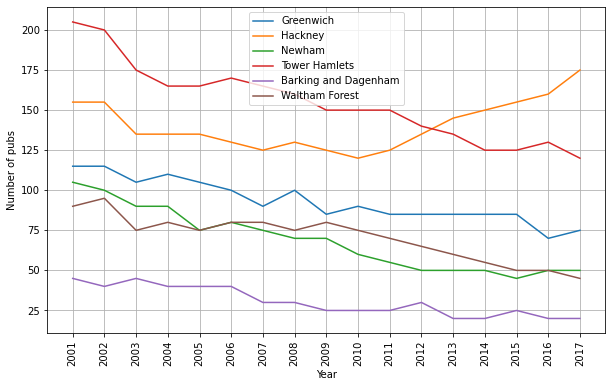

In [5]:
plot_boroughs(pubs_units_boroughs)
plt.ylabel('Number of pubs')

plt.savefig(f'{PLOTS_DIR}/pubs_units_values.png', bbox_inches='tight')
plt.show()

**Observations:**

## Changes (baseline 2005) 

In [6]:
multipliers_2005 = pubs_units[years].div(pubs_units["2005"], axis=0)
multipliers_2005 = pd.concat([pubs_units.iloc[:, :2], multipliers_2005], axis=1)
multipliers_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,1.087739,1.096738,1.019123,1.002250,1.0,0.975253,0.966254,0.947132,0.905512,0.875141,0.848144,0.848144,0.824522,0.813273,0.826772,0.813273,0.794151
1,E09000001,City of London,1.000000,0.975000,0.900000,0.900000,1.0,0.925000,1.000000,0.975000,0.925000,0.950000,0.875000,0.825000,0.775000,0.800000,0.750000,0.750000,0.800000
2,E09000002,Barking and Dagenham,1.125000,1.000000,1.125000,1.000000,1.0,1.000000,0.750000,0.750000,0.625000,0.625000,0.625000,0.750000,0.500000,0.500000,0.625000,0.500000,0.500000
3,E09000003,Barnet,1.080000,1.080000,1.040000,0.960000,1.0,0.960000,0.920000,0.960000,0.880000,0.760000,0.760000,0.760000,0.680000,0.720000,0.760000,0.800000,0.640000
4,E09000004,Bexley,0.904762,0.904762,0.904762,0.952381,1.0,1.000000,1.000000,1.000000,0.857143,0.904762,0.904762,0.904762,0.904762,0.809524,0.857143,0.857143,0.904762


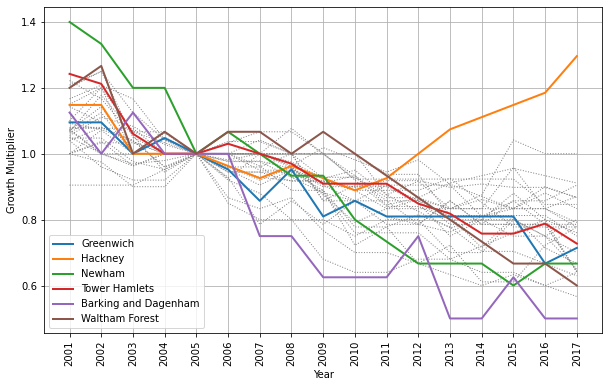

In [7]:
plot_all_boroughs(multipliers_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/pubs_units_multiplier_2005')
plt.show()

## Changes (baseline 2011)

In [8]:
multipliers_2011 = pubs_units[years].div(pubs_units["2011"], axis=0)
multipliers_2011 = pd.concat([pubs_units.iloc[:, :2], multipliers_2011], axis=1)
multipliers_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,1.282493,1.293103,1.201592,1.181698,1.179045,1.149867,1.139257,1.116711,1.067639,1.031830,1.0,1.000000,0.972149,0.958886,0.974801,0.958886,0.936340
1,E09000001,City of London,1.142857,1.114286,1.028571,1.028571,1.142857,1.057143,1.142857,1.114286,1.057143,1.085714,1.0,0.942857,0.885714,0.914286,0.857143,0.857143,0.914286
2,E09000002,Barking and Dagenham,1.800000,1.600000,1.800000,1.600000,1.600000,1.600000,1.200000,1.200000,1.000000,1.000000,1.0,1.200000,0.800000,0.800000,1.000000,0.800000,0.800000
3,E09000003,Barnet,1.421053,1.421053,1.368421,1.263158,1.315789,1.263158,1.210526,1.263158,1.157895,1.000000,1.0,1.000000,0.894737,0.947368,1.000000,1.052632,0.842105
4,E09000004,Bexley,1.000000,1.000000,1.000000,1.052632,1.105263,1.105263,1.105263,1.105263,0.947368,1.000000,1.0,1.000000,1.000000,0.894737,0.947368,0.947368,1.000000


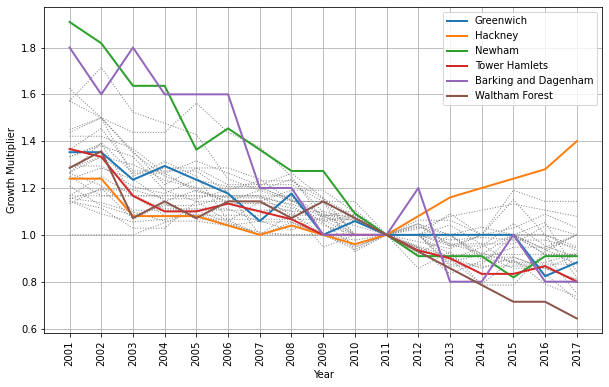

In [9]:
plot_all_boroughs(multipliers_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/pubs_units_multiplier_2011')
plt.show()

# Number of pub employees by borough

In [10]:
pubs_employees = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Pubs employment", skiprows=4, names=columns)
pubs_employees_boroughs = pubs_employees[pubs_employees['Area name'].isin(growth_boroughs)]

pubs_employees_boroughs.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,E09000002,Barking and Dagenham,500.0,600.0,500.0,500.0,500.0,400.0,300.0,300.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0
11,E09000011,Greenwich,800.0,800.0,700.0,800.0,600.0,700.0,700.0,700.0,800.0,700.0,1100.0,1000.0,1400.0,900.0,1000.0,900.0,900.0
12,E09000012,Hackney,700.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,900.0,900.0,1000.0,1200.0,1400.0,1700.0,1800.0,1900.0,2000.0
25,E09000025,Newham,600.0,600.0,600.0,600.0,500.0,500.0,500.0,500.0,400.0,400.0,300.0,300.0,600.0,500.0,500.0,500.0,500.0
30,E09000030,Tower Hamlets,1000.0,1200.0,1200.0,1100.0,1300.0,1300.0,1300.0,1300.0,1300.0,1200.0,1400.0,1400.0,1500.0,1500.0,1300.0,1300.0,1200.0


## Aboslute value of growth boroughs

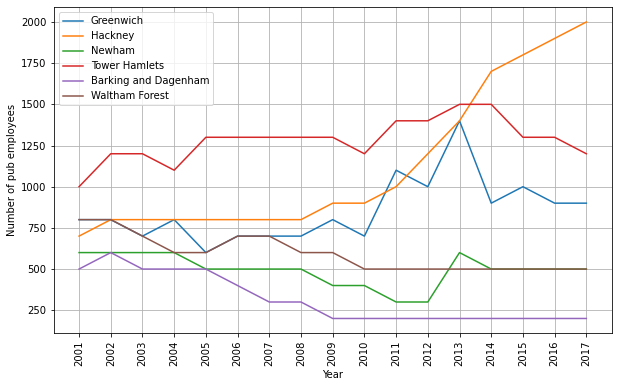

In [11]:
plot_boroughs(pubs_employees_boroughs)
plt.ylabel('Number of pub employees')

plt.savefig(f'{PLOTS_DIR}/pubs_employees_values.png', bbox_inches='tight')
plt.show()

## Changes (baseline 2005)

In [12]:
multipliers_emp_2005 = pubs_employees[years].div(pubs_employees["2005"], axis=0)
multipliers_emp_2005 = pd.concat([pubs_employees.iloc[:, :2], multipliers_emp_2005], axis=1)
multipliers_emp_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,1.073048,1.070529,1.035264,1.017632,1.0,1.007557,1.010076,0.984887,1.012594,0.969773,0.987406,1.055416,1.083123,1.118388,1.183879,1.166247,1.168766
1,E09000001,City of London,0.954545,0.863636,0.954545,0.909091,1.0,0.909091,0.954545,0.954545,1.000000,0.954545,0.954545,1.090909,1.045455,1.090909,1.136364,1.045455,1.181818
2,E09000002,Barking and Dagenham,1.000000,1.200000,1.000000,1.000000,1.0,0.800000,0.600000,0.600000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000
3,E09000003,Barnet,1.272727,1.090909,1.090909,1.000000,1.0,1.181818,1.000000,1.000000,1.000000,0.909091,0.909091,0.909091,0.909091,0.818182,1.000000,1.000000,0.909091
4,E09000004,Bexley,1.111111,1.111111,1.111111,1.111111,1.0,1.000000,1.111111,1.111111,1.111111,1.000000,1.111111,1.111111,1.111111,1.111111,1.222222,1.222222,1.333333


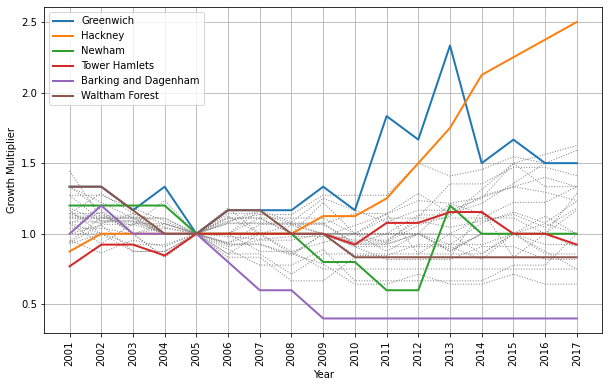

In [13]:
plot_all_boroughs(multipliers_emp_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/pubs_employees_multiplier_2005')
plt.show()

## Changes (baseline 2011)

In [14]:
multipliers_emp_2011 = pubs_employees[years].div(pubs_employees["2011"], axis=0)
multipliers_emp_2011 = pd.concat([pubs_employees.iloc[:, :2], multipliers_emp_2011], axis=1)
multipliers_emp_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,1.086735,1.084184,1.048469,1.030612,1.012755,1.020408,1.022959,0.997449,1.025510,0.982143,1.0,1.068878,1.096939,1.132653,1.198980,1.181122,1.183673
1,E09000001,City of London,1.000000,0.904762,1.000000,0.952381,1.047619,0.952381,1.000000,1.000000,1.047619,1.000000,1.0,1.142857,1.095238,1.142857,1.190476,1.095238,1.238095
2,E09000002,Barking and Dagenham,2.500000,3.000000,2.500000,2.500000,2.500000,2.000000,1.500000,1.500000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,E09000003,Barnet,1.400000,1.200000,1.200000,1.100000,1.100000,1.300000,1.100000,1.100000,1.100000,1.000000,1.0,1.000000,1.000000,0.900000,1.100000,1.100000,1.000000
4,E09000004,Bexley,1.000000,1.000000,1.000000,1.000000,0.900000,0.900000,1.000000,1.000000,1.000000,0.900000,1.0,1.000000,1.000000,1.000000,1.100000,1.100000,1.200000


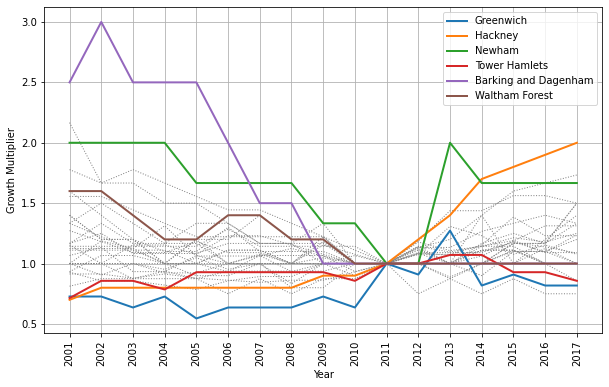

In [15]:
plot_all_boroughs(multipliers_emp_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/pubs_employees_multiplier_2011')
plt.show()

# Number of small public houses and bars by borough


In [16]:
small_pubs = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Small Pubs units", skiprows=4, names=columns)
small_pubs_boroughs = small_pubs[small_pubs['Area name'].isin(growth_boroughs)]

small_pubs_boroughs.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,E09000002,Barking and Dagenham,30.0,25.0,30.0,25.0,30.0,25.0,15.0,20.0,20.0,20.0,15.0,20.0,15.0,15.0,15.0,15.0,15.0
11,E09000011,Greenwich,90.0,90.0,85.0,90.0,85.0,80.0,65.0,70.0,60.0,65.0,55.0,55.0,50.0,55.0,50.0,40.0,45.0
12,E09000012,Hackney,145.0,140.0,120.0,120.0,110.0,105.0,100.0,110.0,100.0,100.0,95.0,100.0,95.0,90.0,90.0,85.0,100.0
25,E09000025,Newham,90.0,90.0,80.0,75.0,60.0,65.0,65.0,60.0,55.0,45.0,45.0,45.0,35.0,40.0,35.0,40.0,35.0
30,E09000030,Tower Hamlets,180.0,175.0,145.0,140.0,135.0,130.0,130.0,125.0,115.0,115.0,110.0,95.0,90.0,85.0,80.0,85.0,80.0


## Absolute value of growth boroughs

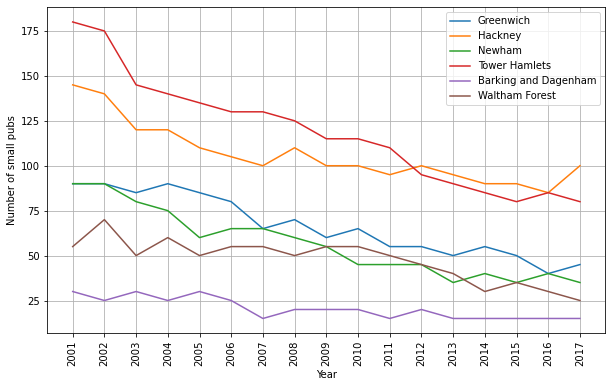

In [17]:
plot_boroughs(small_pubs_boroughs)
plt.ylabel('Number of small pubs')

plt.savefig(f'{PLOTS_DIR}/small_pubs_units_values.png', bbox_inches='tight')
plt.show()

## Changes (baseline 2005)

In [18]:
multipliers_sm_2005 = small_pubs[years].div(small_pubs["2005"], axis=0)
multipliers_sm_2005 = pd.concat([small_pubs.iloc[:, :2], multipliers_sm_2005], axis=1)
multipliers_sm_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,1.124378,1.149254,1.034826,1.021559,1.0,0.963516,0.927032,0.912106,0.847430,0.809287,0.769486,0.734660,0.671642,0.621891,0.616915,0.587065,0.557214
1,E09000001,City of London,0.956522,1.043478,0.782609,0.826087,1.0,0.913043,1.043478,0.956522,0.782609,0.826087,0.695652,0.565217,0.521739,0.478261,0.434783,0.391304,0.391304
2,E09000002,Barking and Dagenham,1.000000,0.833333,1.000000,0.833333,1.0,0.833333,0.500000,0.666667,0.666667,0.666667,0.500000,0.666667,0.500000,0.500000,0.500000,0.500000,0.500000
3,E09000003,Barnet,1.187500,1.125000,1.125000,1.000000,1.0,1.000000,1.000000,1.000000,0.937500,0.750000,0.750000,0.750000,0.687500,0.750000,0.750000,0.750000,0.562500
4,E09000004,Bexley,0.733333,0.800000,0.800000,0.866667,1.0,1.000000,0.933333,1.000000,0.733333,0.800000,0.866667,0.800000,0.866667,0.666667,0.733333,0.733333,0.733333


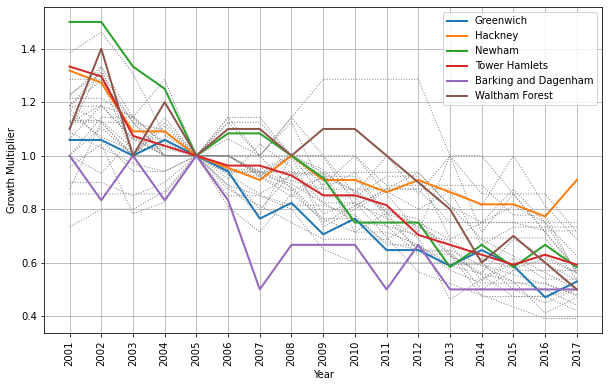

In [19]:
plot_all_boroughs(multipliers_sm_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/small_pubs_units_multiplier_2005')
plt.show()

## Changes (baseline 2011)

In [20]:
multipliers_sm_2011 = small_pubs[years].div(small_pubs["2011"], axis=0)
multipliers_sm_2011 = pd.concat([small_pubs.iloc[:, :2], multipliers_sm_2011], axis=1)
multipliers_sm_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,1.461207,1.493534,1.344828,1.327586,1.299569,1.252155,1.204741,1.185345,1.101293,1.051724,1.0,0.954741,0.872845,0.808190,0.801724,0.762931,0.724138
1,E09000001,City of London,1.375000,1.500000,1.125000,1.187500,1.437500,1.312500,1.500000,1.375000,1.125000,1.187500,1.0,0.812500,0.750000,0.687500,0.625000,0.562500,0.562500
2,E09000002,Barking and Dagenham,2.000000,1.666667,2.000000,1.666667,2.000000,1.666667,1.000000,1.333333,1.333333,1.333333,1.0,1.333333,1.000000,1.000000,1.000000,1.000000,1.000000
3,E09000003,Barnet,1.583333,1.500000,1.500000,1.333333,1.333333,1.333333,1.333333,1.333333,1.250000,1.000000,1.0,1.000000,0.916667,1.000000,1.000000,1.000000,0.750000
4,E09000004,Bexley,0.846154,0.923077,0.923077,1.000000,1.153846,1.153846,1.076923,1.153846,0.846154,0.923077,1.0,0.923077,1.000000,0.769231,0.846154,0.846154,0.846154


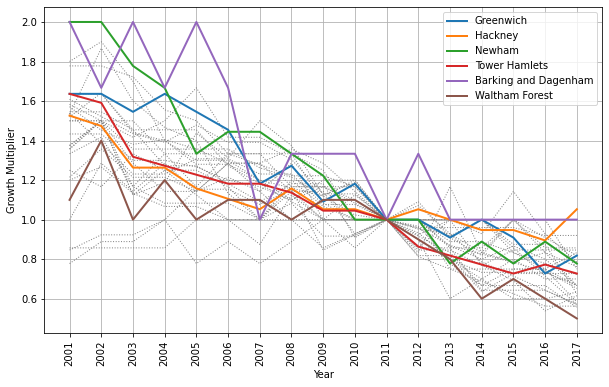

In [21]:
plot_all_boroughs(multipliers_sm_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/small_pubs_units_multiplier_2011')
plt.show()

# Number of employees of small pubs by borough

In [22]:
small_pubs_employees = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Small Pubs employment", skiprows=4, names=columns)

small_pubs_employees.dropna(inplace=True)
small_pubs_employees = small_pubs_employees[~small_pubs_employees['Area name'].isin(['Barking and Dagenham','Merton']) ]

small_pubs_employees_boroughs = small_pubs_employees[small_pubs_employees['Area name'].isin(growth_boroughs)]
small_pubs_employees_boroughs.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
11,E09000011,Greenwich,400.0,400.0,400.0,400.0,300.0,300.0,300.0,300.0,200.0,200,200,200,200,200.0,200.0,200,200
12,E09000012,Hackney,500.0,500.0,500.0,400.0,400.0,400.0,400.0,400.0,400.0,400,400,400,400,400.0,400.0,400,400
25,E09000025,Newham,400.0,400.0,300.0,300.0,200.0,200.0,200.0,200.0,200.0,200,200,200,100,100.0,100.0,100,100
30,E09000030,Tower Hamlets,600.0,600.0,600.0,500.0,500.0,500.0,500.0,500.0,400.0,400,400,400,400,300.0,300.0,400,300
31,E09000031,Waltham Forest,300.0,400.0,200.0,300.0,200.0,300.0,200.0,200.0,200.0,200,200,200,200,100.0,100.0,100,100


## Absolute value of growth boroughs

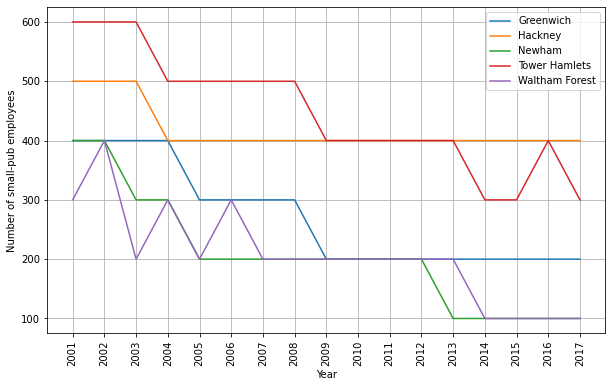

In [23]:
plot_boroughs(small_pubs_employees_boroughs)
plt.ylabel('Number of small-pub employees')

plt.savefig(f'{PLOTS_DIR}/small_pubs_employees_values.png', bbox_inches='tight')
plt.show()

## Changes (baseline 2005)

In [24]:
multipliers_sm_emp_2005 = small_pubs_employees[years].div(small_pubs_employees["2005"], axis=0)
multipliers_sm_emp_2005 = pd.concat([small_pubs_employees.iloc[:, :2], multipliers_sm_emp_2005], axis=1)
multipliers_sm_emp_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,1.224638,1.210145,1.086957,1.043478,1.0,0.949275,0.913043,0.869565,0.811594,0.76087,0.724638,0.710145,0.666667,0.623188,0.608696,0.572464,0.543478
1,E09000001,City of London,0.857143,1.000000,0.714286,0.714286,1.0,0.857143,1.000000,0.857143,0.714286,0.714286,0.571429,0.428571,0.571429,0.428571,0.428571,0.428571,0.428571
3,E09000003,Barnet,1.250000,1.250000,1.250000,1.000000,1.0,1.000000,0.750000,0.750000,0.750000,0.5,0.75,0.75,0.5,0.500000,0.750000,0.75,0.5
4,E09000004,Bexley,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.666667,1,1,0.666667,1,0.666667,0.666667,0.666667,0.666667
5,E09000005,Brent,1.333333,1.333333,1.333333,1.333333,1.0,1.000000,1.000000,1.000000,1.000000,1,1,1,1,0.666667,0.666667,0.666667,0.666667


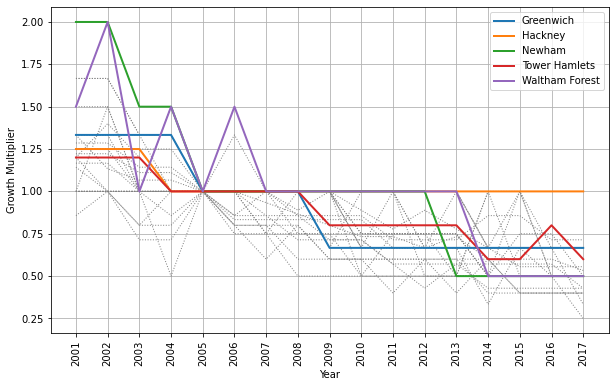

In [25]:
plot_all_boroughs(multipliers_sm_emp_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/small_pubs_employees_multiplier_2005')
plt.show()

## Changes (baseline 2011)

In [26]:
multipliers_sm_emp_2011 = small_pubs_employees[years].div(small_pubs_employees["2011"], axis=0)
multipliers_sm_emp_2011 = pd.concat([small_pubs_employees.iloc[:, :2], multipliers_sm_emp_2011], axis=1)
multipliers_sm_emp_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,1.69,1.67,1.5,1.44,1.38,1.31,1.26,1.2,1.12,1.05,1,0.98,0.92,0.86,0.84,0.79,0.75
1,E09000001,City of London,1.5,1.75,1.25,1.25,1.75,1.5,1.75,1.5,1.25,1.25,1,0.75,1,0.75,0.75,0.75,0.75
3,E09000003,Barnet,1.66667,1.66667,1.66667,1.33333,1.33333,1.33333,1,1,1,0.666667,1,1,0.666667,0.666667,1,1,0.666667
4,E09000004,Bexley,1,1,1,1,1,1,1,1,0.666667,1,1,0.666667,1,0.666667,0.666667,0.666667,0.666667
5,E09000005,Brent,1.33333,1.33333,1.33333,1.33333,1,1,1,1,1,1,1,1,1,0.666667,0.666667,0.666667,0.666667


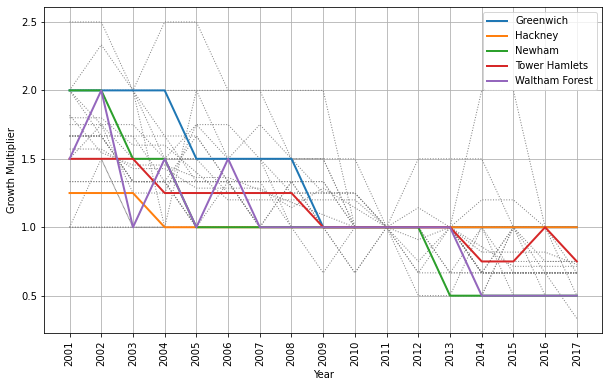

In [27]:
plot_all_boroughs(multipliers_sm_emp_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/small_pubs_employees_multiplier_2011')
plt.show()